In [1]:
import numpy as np
import imageio
import matplotlib.pyplot as plt

import requests
import json

In [2]:
new_s = imageio.imread('./02_01_001.png').reshape(1, 600, 800, 3).astype('float32')
new_s.dtype

dtype('float32')

In [3]:
data = json.dumps({"signature_name": "serving_default", "instances": new_s[:1].tolist()})
print('Data: {} ... {}'.format(data[:50], data[len(data)-52:]))

Data: {"signature_name": "serving_default", "instances": ... 0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0]]]]}


#### Note that tf-serving automatically serves the newest-version model and will unload the older version. Thus, if you have exported version 2 model, that means you cannot call ~~http://localhost:8501/v1/models/road_seg/versions/1:predict~~ in bellow cell, instead you can call <font color=red>http://localhost:8501/v1/models/road_seg/versions/2:predict</font>, the one next to he bellow cell(cell 5).

Wall time: 1.43 s


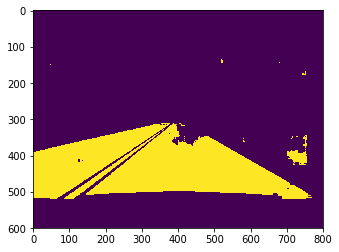

In [4]:
headers = {"content-type": "application/json"}
%time json_response = requests.post('http://localhost:8501/v1/models/road_seg/versions/1:predict', data=data, headers=headers)
predictions = json.loads(json_response.text)['predictions']

pred = np.array(predictions)
pred = np.array([1 if i >= 0.5 else 0 for i in pred.flatten()]).reshape(600, 800)

plt.imshow(pred)

Wall time: 1.47 s


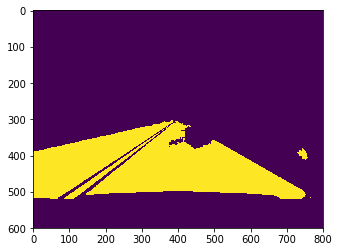

In [5]:
headers = {"content-type": "application/json"}
%time json_response = requests.post('http://localhost:8501/v1/models/road_seg/versions/2:predict', data=data, headers=headers)
predictions = json.loads(json_response.text)['predictions']

pred = np.array(predictions)
pred = np.array([1 if i >= 0.5 else 0 for i in pred.flatten()]).reshape(600, 800)

plt.imshow(pred)